# Plotting with seaborn

ScmData provides limited support for plotting. However, we make it as easy as possible to return data in a format which can be used with the [seaborn](https://seaborn.pydata.org/index.html) plotting library. Given the power of this library, we recommend having a look through its documentation if you want to make anything more than the most basic plots.

In [1]:
# NBVAL_IGNORE_OUTPUT
import matplotlib.pyplot as plt
import seaborn as sns
from scmdata.run import ScmRun
from scmdata.plotting import RCMIP_SCENARIO_COLOURS

<IPython.core.display.Javascript object>

pyam - INFO: Running in a notebook, setting `pyam` logging level to `logging.INFO` and adding stderr handler


## Data

For this notebook we use the RCMIP radiative forcings, available at rcmip.org.

In [2]:
# NBVAL_IGNORE_OUTPUT
rcmip_db = ScmRun("rcmip-radiative-forcing-annual-means-v4-0-0.csv")
rcmip_db.head()

time                                                                                                   1750-01-01 00:00:00  \
model scenario region variable                                           unit  mip_era activity_id                           
AIM   rcp60    World  Radiative Forcing                                  W/m^2 CMIP5   not_applicable                  NaN   
                      Radiative Forcing|Anthropogenic                    W/m^2 CMIP5   not_applicable                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols           W/m^2 CMIP5   not_applicable                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2 CMIP5   not_applicable                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2 CMIP5   not_applicable                  NaN   

time                                                                                                   1751-01-01 00:00:00  \
model scenario region variable                                           unit  mip_era activity_id                           
AIM   rcp60    World  Radiative Forcing                                  W/m^2 CMIP5   not_applicable                  NaN   
                      Radiative Forcing|Anthropogenic                    W/m^2 CMIP5   not_applicable                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols           W/m^2 CMIP5   not_applicable                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2 CMIP5   not_applicable                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2 CMIP5   not_applicable                  NaN   

time                                                                                                   1752-01-01 00:00:00  \
model scenario region variable                                           unit  mip_era activity_id                           
AIM   rcp60    World  Radiative Forcing                                  W/m^2 CMIP5   not_applicable                  NaN   
                      Radiative Forcing|Anthropogenic                    W/m^2 CMIP5   not_applicable                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols           W/m^2 CMIP5   not_applicable                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2 CMIP5   not_applicable                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2 CMIP5   not_applicable                  NaN   

time                                                                                                   1753-01-01 00:00:00  \
model scenario region variable                                           unit  mip_era activity_id                           
AIM   rcp60    World  Radiative Forcing                                  W/m^2 CMIP5   not_applicable                  NaN   
                      Radiative Forcing|Anthropogenic                    W/m^2 CMIP5   not_applicable                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols           W/m^2 CMIP5   not_applicable                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2 CMIP5   not_applicable                  NaN   
                      Radiative Forcing|Anthropogenic|Aerosols|Aeroso... W/m^2 CMIP5   not_applicable                  NaN   

time                                                                                                   1754-01-01 00:00:00  \
model scenario region variable                                           unit  mip_era activity_id                           
AIM   rcp60    World  Radiative Forcing                                  W/m^2 CMIP5   not_applicable                  NaN   
                      Radiative Forcing|Anthropogenic                    W/m^2 CMIP5   not

## Plotting with ScmRun

For the most common plotting patterns, we provide a very simple `lineplot` method in `ScmRun`. These routines are also available for `ScmDataFrame`s.

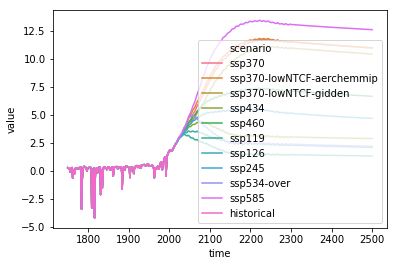

In [3]:
# NBVAL_IGNORE_OUTPUT
out = rcmip_db.filter(variable="Effective Radiative Forcing").lineplot()
out

``kwargs`` passed to this method are given directly to [``seaborn.lineplot``](https://seaborn.pydata.org/generated/seaborn.lineplot.html), which allows an extra layer of control.

For example, we can plot on slightly bigger axes, make the lines slightly transparent, add markers for the different models, specify the colour to use for each scenario and specify the order to display the scenarios in.

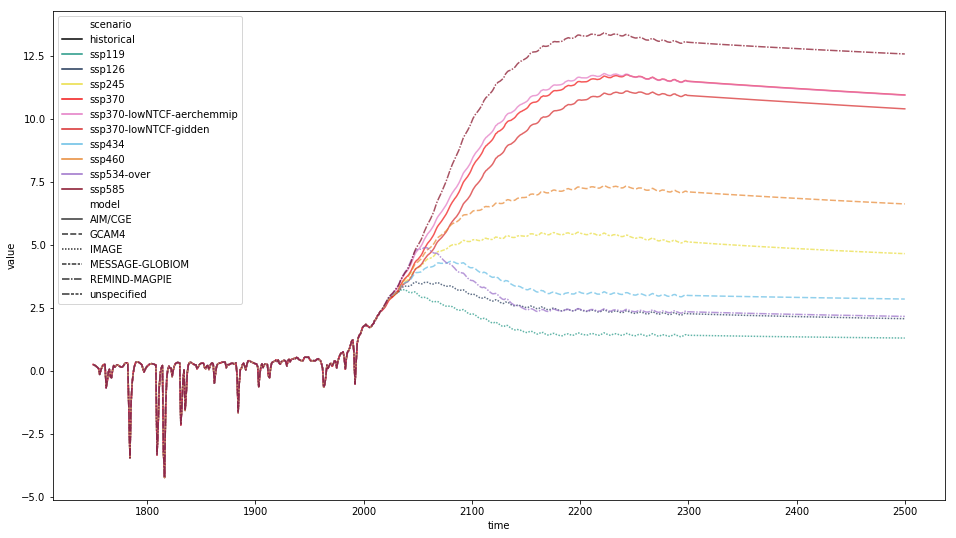

In [4]:
# NBVAL_IGNORE_OUTPUT
ax = plt.figure(figsize=(16, 9)).add_subplot(111)
rcmip_db.filter(variable="Effective Radiative Forcing").lineplot(
    ax=ax,
    hue="scenario",
    palette=RCMIP_SCENARIO_COLOURS,
    hue_order=RCMIP_SCENARIO_COLOURS.keys(),
    style="model",
    alpha=0.7,
)

## Plotting with seaborn

If you wish to make plots which are more complex than this most basic pattern, a combination of seaborn and pandas reshaping is your best bet.

### Plotting on a grid

Often we wish to look at lots of different variables at once. Seaborn allows this sort of 'gridded' plotting, as shown below.

In [5]:
vars_to_plot = ["Effective Radiative Forcing"] + [
    "Effective Radiative Forcing|{}".format(v)
    for v in [
        "Anthropogenic",
        "Anthropogenic|Aerosols",
        "Anthropogenic|CO2",
        "Anthropogenic|CH4",
        "Anthropogenic|N2O",
    ]
]
vars_to_plot

['Effective Radiative Forcing',
 'Effective Radiative Forcing|Anthropogenic',
 'Effective Radiative Forcing|Anthropogenic|Aerosols',
 'Effective Radiative Forcing|Anthropogenic|CO2',
 'Effective Radiative Forcing|Anthropogenic|CH4',
 'Effective Radiative Forcing|Anthropogenic|N2O']

In [6]:
# NBVAL_IGNORE_OUTPUT
seaborn_df = rcmip_db.filter(variable=vars_to_plot).long_data()
seaborn_df.head()

,model,scenario,region,variable,unit,mip_era,activity_id,time,value
0,AIM/CGE,ssp370,World,Effective Radiative Forcing,W/m^2,CMIP6,not_applicable,1750-01-01 00:00:00,0.259367
1,AIM/CGE,ssp370,World,Effective Radiative Forcing,W/m^2,CMIP6,not_applicable,1751-01-01 00:00:00,0.242788
2,AIM/CGE,ssp370,World,Effective Radiative Forcing,W/m^2,CMIP6,not_applicable,1752-01-01 00:00:00,0.214656
3,AIM/CGE,ssp370,World,Effective Radiative Forcing,W/m^2,CMIP6,not_applicable,1753-01-01 00:00:00,0.179488
4,AIM/CGE,ssp370,World,Effective Radiative Forcing,W/m^2,CMIP6,not_applicable,1754-01-01 00:00:00,0.145354


With the output of `.long_data()` we can directly use [``seaborn.relplot``](https://seaborn.pydata.org/generated/seaborn.relplot.html).

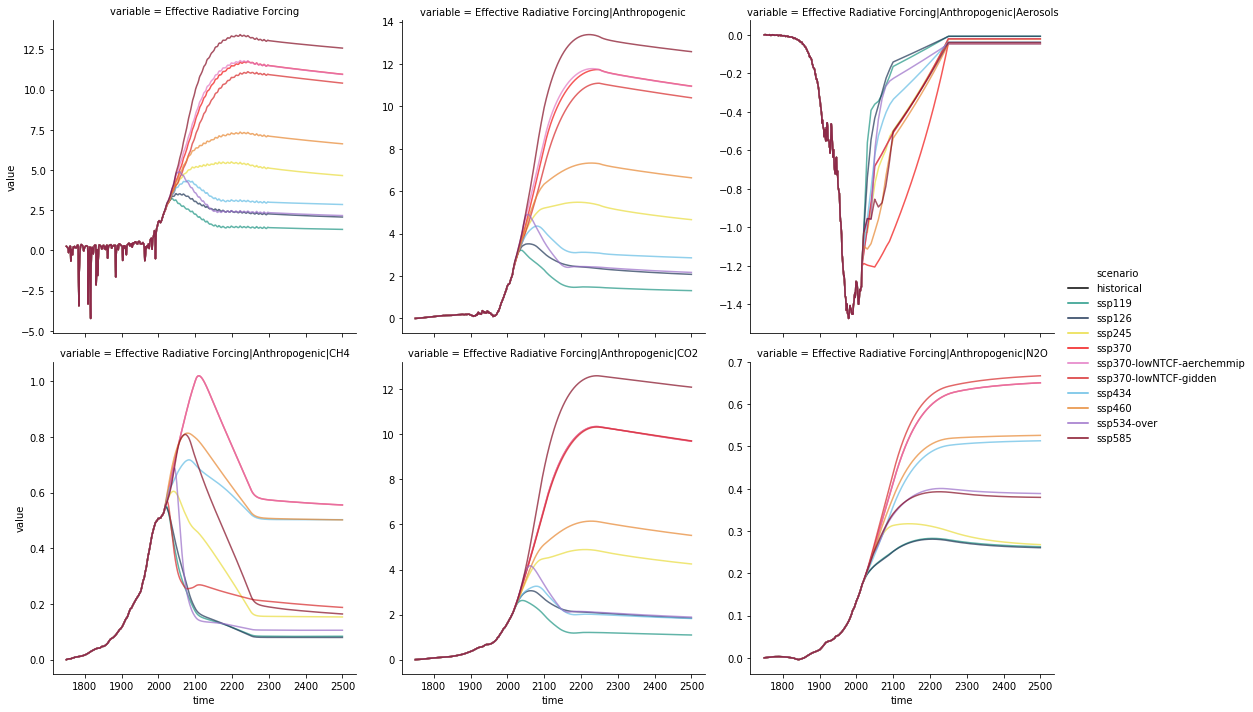

In [7]:
# NBVAL_IGNORE_OUTPUT
sns.relplot(
    data=seaborn_df,
    x="time",
    y="value",
    col="variable",
    col_wrap=3,
    hue="scenario",
    palette=RCMIP_SCENARIO_COLOURS,
    hue_order=RCMIP_SCENARIO_COLOURS.keys(),
    alpha=0.7,
    facet_kws={"sharey": False},
    kind="line",
)

### Variable scatter plots

Sometimes we don't want to plot against time, rather we want to plot variables against each other. For example, we might want to see how the effective radiative forcings relate to each other in the different scenarios. In such a case we can reshape the data using pandas before using seaborn.

In [8]:
# NBVAL_IGNORE_OUTPUT
ts = rcmip_db.filter(variable=vars_to_plot[:4]).timeseries()
ts.head()

time                                                                                                                      1750-01-01 00:00:00  \
model   scenario                  region variable                                           unit  mip_era activity_id                           
AIM/CGE ssp370                    World  Effective Radiative Forcing                        W/m^2 CMIP6   not_applicable             0.259367   
                                         Effective Radiative Forcing|Anthropogenic          W/m^2 CMIP6   not_applicable             0.000000   
                                         Effective Radiative Forcing|Anthropogenic|Aerosols W/m^2 CMIP6   not_applicable             0.000000   
                                         Effective Radiative Forcing|Anthropogenic|CO2      W/m^2 CMIP6   not_applicable             0.000000   
        ssp370-lowNTCF-aerchemmip World  Effective Radiative Forcing                        W/m^2 CMIP6   not_applicable             0.259367   

time                                                                                                                      1751-01-01 00:00:00  \
model   scenario                  region variable                                           unit  mip_era activity_id                           
AIM/CGE ssp370                    World  Effective Radiative Forcing                        W/m^2 CMIP6   not_applicable             0.242788   
                                         Effective Radiative Forcing|Anthropogenic          W/m^2 CMIP6   not_applicable             0.001756   
                                         Effective Radiative Forcing|Anthropogenic|Aerosols W/m^2 CMIP6   not_applicable             0.000836   
                                         Effective Radiative Forcing|Anthropogenic|CO2      W/m^2 CMIP6   not_applicable             0.000824   
        ssp370-lowNTCF-aerchemmip World  Effective Radiative Forcing                        W/m^2 CMIP6   not_applicable             0.242788   

time                                                                                                                      1752-01-01 00:00:00  \
model   scenario                  region variable                                           unit  mip_era activity_id                           
AIM/CGE ssp370                    World  Effective Radiative Forcing                        W/m^2 CMIP6   not_applicable             0.214656   
                                         Effective Radiative Forcing|Anthropogenic          W/m^2 CMIP6   not_applicable             0.003698   
                                         Effective Radiative Forcing|Anthropogenic|Aerosols W/m^2 CMIP6   not_applicable             0.001212   
                                         Effective Radiative Forcing|Anthropogenic|CO2      W/m^2 CMIP6   not_applicable             0.001647   
        ssp370-lowNTCF-aerchemmip World  Effective Radiative Forcing                        W/m^2 CMIP6   not_applicable             0.214656   

time                                                                                                                      1753-01-01 00:00:00  \
model   scenario                  region variable                                           unit  mip_era activity_id                           
AIM/CGE ssp370                    World  Effective Radiative Forcing                        W/m^2 CMIP6   not_applicable             0.179488   
                                         Effective Radiative Forcing|Anthropogenic          W/m^2 CMIP6   not_applicable             0.004707   
                                         Effective Radiative Forcing|Anthropogenic|Aerosols W/m^2 CMIP6   not_applicable             0.000801   
                                         Effective Radiative Forcing|Anthropogenic|CO2      W/m^2 CMIP6   not_applicable             0.002330   
        ssp370-lowNTCF-aerchemmip World  Effective Radiative Forcing              

In [9]:
# NBVAL_IGNORE_OUTPUT
ts_reshaped = ts.unstack("variable").stack("time").reset_index("scenario")
ts_reshaped.head()

variable                                                        scenario  \
model   region unit  mip_era activity_id    time                           
AIM/CGE World  W/m^2 CMIP6   not_applicable 1750-01-01 00:00:00   ssp370   
                                            1751-01-01 00:00:00   ssp370   
                                            1752-01-01 00:00:00   ssp370   
                                            1753-01-01 00:00:00   ssp370   
                                            1754-01-01 00:00:00   ssp370   

variable                                                         Effective Radiative Forcing  \
model   region unit  mip_era activity_id    time                                               
AIM/CGE World  W/m^2 CMIP6   not_applicable 1750-01-01 00:00:00                     0.259367   
                                            1751-01-01 00:00:00                     0.242788   
                                            1752-01-01 00:00:00                     0.214656   
                                            1753-01-01 00:00:00                     0.179488   
                                            1754-01-01 00:00:00                     0.145354   

variable                                                         Effective Radiative Forcing|Anthropogenic  \
model   region unit  mip_era activity_id    time                                                             
AIM/CGE World  W/m^2 CMIP6   not_applicable 1750-01-01 00:00:00                                   0.000000   
                                            1751-01-01 00:00:00                                   0.001756   
                                            1752-01-01 00:00:00                                   0.003698   
                                            1753-01-01 00:00:00                                   0.004707   
                                            1754-01-01 00:00:00                                   0.004987   

variable                                                         Effective Radiative Forcing|Anthropogenic|Aerosols  \
model   region unit  mip_era activity_id    time                                                                      
AIM/CGE World  W/m^2 CMIP6   not_applicable 1750-01-01 00:00:00                                           0.000000    
                                            1751-01-01 00:00:00                                           0.000836    
                                            1752-01-01 00:00:00                                           0.001212    
                                            1753-01-01 00:00:00                                           0.000801    
                                            1754-01-01 00:00:00                                          -0.000571    

variable                                                         Effective Radiative Forcing|Anthropogenic|CO2  
model   region unit  mip_era activity_id    time                                                                
AIM/CGE World  W/m^2 CMIP6   not_applicable 1750-01-01 00:00:00                                       0.000000  
                                            1751-01-01 00:00:00                                       0.000824  
                                            1752-01-01 00:00:00                                       0.001647  
                                            1753-01-01 00:00:00                                       0.002330  
                                            1754-01-01 00:00:00                                       0.003153

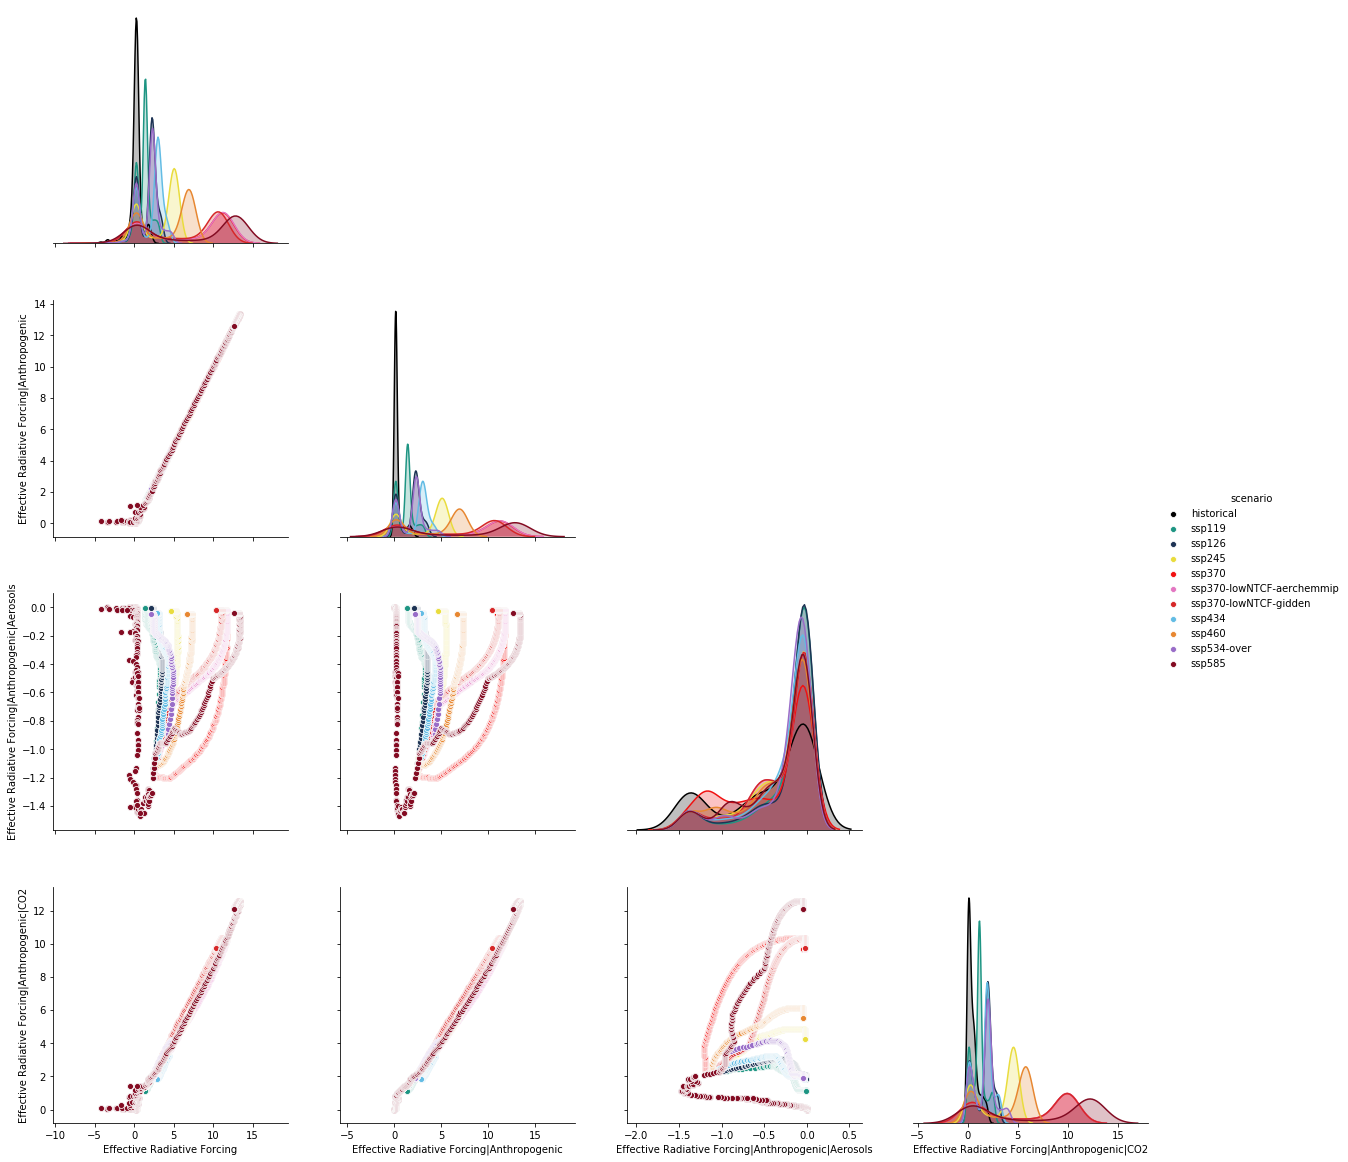

In [10]:
# NBVAL_IGNORE_OUTPUT
sns.pairplot(
    ts_reshaped,
    hue="scenario",
    palette=RCMIP_SCENARIO_COLOURS,
    hue_order=RCMIP_SCENARIO_COLOURS.keys(),
    corner=True,
    height=4,
)